<a href="https://colab.research.google.com/github/afafrafat77/Machin_Learning_Models/blob/main/Linear_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [429]:
df=pd.read_csv('Housing.csv')

In [430]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [431]:
df.shape


(545, 13)

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [433]:
df.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [434]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [435]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns

In [436]:
# Separate features (X) and target (y)
x = df.drop('price', axis=1)
y = df['price']

In [437]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

In [438]:
encoded_data = one_hot_encoder.fit_transform(x[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categorical_features))
encoded_df=encoded_df.astype(int)
x=x.drop(columns=categorical_features)
x= pd.concat([x, encoded_df], axis=1)

In [439]:
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
1,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0
3,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0
4,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0


In [440]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   area                             545 non-null    int64
 1   bedrooms                         545 non-null    int64
 2   bathrooms                        545 non-null    int64
 3   stories                          545 non-null    int64
 4   parking                          545 non-null    int64
 5   mainroad_no                      545 non-null    int64
 6   mainroad_yes                     545 non-null    int64
 7   guestroom_no                     545 non-null    int64
 8   guestroom_yes                    545 non-null    int64
 9   basement_no                      545 non-null    int64
 10  basement_yes                     545 non-null    int64
 11  hotwaterheating_no               545 non-null    int64
 12  hotwaterheating_yes              545 non-null    i

In [441]:
scalar = StandardScaler()

#Apply Scalling
x[numerical_features] = scalar.fit_transform(df[numerical_features])

In [442]:
x[numerical_features]

,price,area,bedrooms,bathrooms,stories,parking
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692
...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,1.517692
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-0.805741
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-0.805741


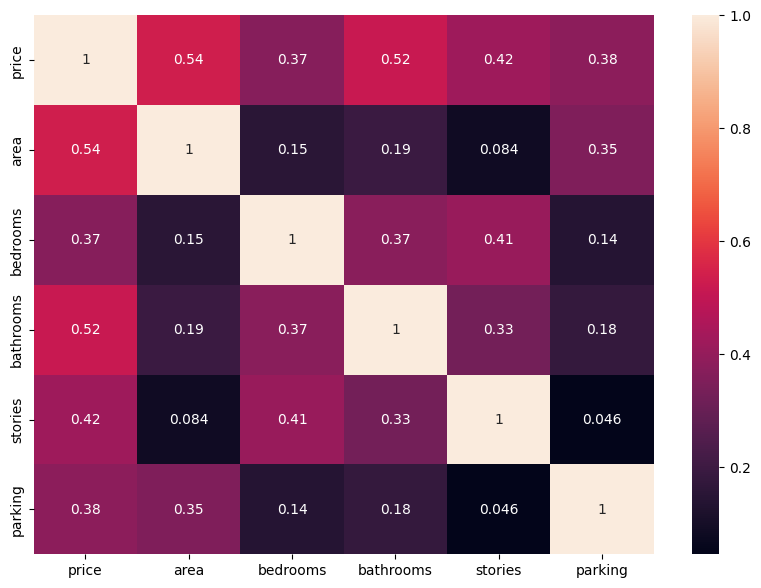

In [443]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[numerical_features].corr(),annot=True)
plt.show()



In [444]:
import random

def simple_trick(m, b, r, p):

    # Pick two very small random numbers
    x1 = random.uniform(0.0001, 0.001)
    x2 = random.uniform(0.0001, 0.001)

    # Case 1: Point is above the line and to the right of the y-axis
    if p > m * r + b and r > 0:
        m_new = m + x1
        b_new = b + x2
    # Case 2: Point is above the line and to the left of the y-axis
    elif p > m * r + b and r < 0:
        m_new = m - x1
        b_new = b + x2
    # Case 3: Point is below the line and to the right of the y-axis
    elif p < m * r + b and r > 0:
        m_new = m - x1
        b_new = b - x2
    # Case 4: Point is below the line and to the left of the y-axis
    elif p < m * r + b and r < 0:
        m_new = m + x1
        b_new = b - x2

    return m_new, b_new

In [445]:
def absolute_trick(m, b, r, p, h):

    # Caculate the predicted value
    p_hat = m * r + b

    # Case 1: Point is above the line
    if p > p_hat:
        m_new = m + h * r
        b_new = b + h
    # Case 2: Point is below the line
    elif p < p_hat:
        m_new = m - h * r
        b_new = b - h

    return m_new, b_new


In [446]:
def square_trick(m, b, r, p, h):
    # Calculate the predicted value
    p_hat = m * r + b

    # Adjust slope and intercept
    m_new = m + h * r * (p - p_hat)
    b_new = b + h * (p - p_hat)

    return m_new, b_new



In [447]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [448]:
# Linear regression with multiple tricks
def linear_regression_with_tricks(feature ,label, trick_type, h=0.001, epochs=1000):

    m = df['price'].mean() / df['area'].mean()  # Initial slope based on price/area ratio
    b = df['price'].mean()  # Initial intercept set to mean price
    # Loop over the data multiple times (iterations)
    for _ in range(epochs):
        for r, p in zip(feature['area'], label):
            if trick_type == 'simple':
                m, b = simple_trick(m, b, r, p)
            elif trick_type == 'absolute':
                m, b = absolute_trick(m, b, r, p, h)
            elif trick_type == 'square':
                m, b = square_trick(m, b, r, p, h)

    return m, b

# Perform linear regression using the Simple Trick
m_simple, b_simple = linear_regression_with_tricks(feature=X_train,label=y_train,trick_type='simple', h=0.001)
print(f"Simple Trick - Final Line: p̂ = {m_simple}r + {b_simple}")

# Perform linear regression using the Absolute Trick
m_absolute, b_absolute = linear_regression_with_tricks(feature=X_train,label=y_train, trick_type='absolute', h=0.001)
print(f"Absolute Trick - Final Line: p̂ = {m_absolute}r + {b_absolute}")

# Perform linear regression using the Square Trick
m_square, b_square = linear_regression_with_tricks(feature=X_train,label=y_train, trick_type='square', h=0.001)
print(f"Square Trick - Final Line: p̂ = {m_square}r + {b_square}")


Simple Trick - Final Line: p̂ = 1059.5948421916835r + 4766678.683100563
Absolute Trick - Final Line: p̂ = 1137.2991220416848r + 4766637.247691342
Square Trick - Final Line: p̂ = 1083667.5452211518r + 4780935.665938757


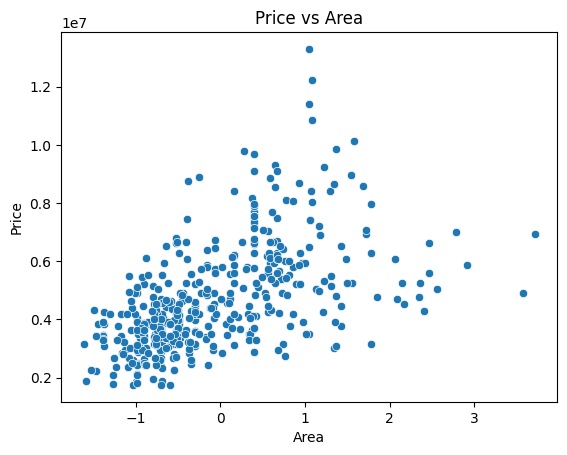

In [449]:
sns.scatterplot(x=X_train['area'], y=y_train)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()

In [450]:
model = LinearRegression()
model.fit(X_train[['area']],y_train)

LinearRegression()

In [451]:
#want to get weights and bias
print(model.coef_)
print(model.intercept_)

[1089665.178376]
4783851.275955614


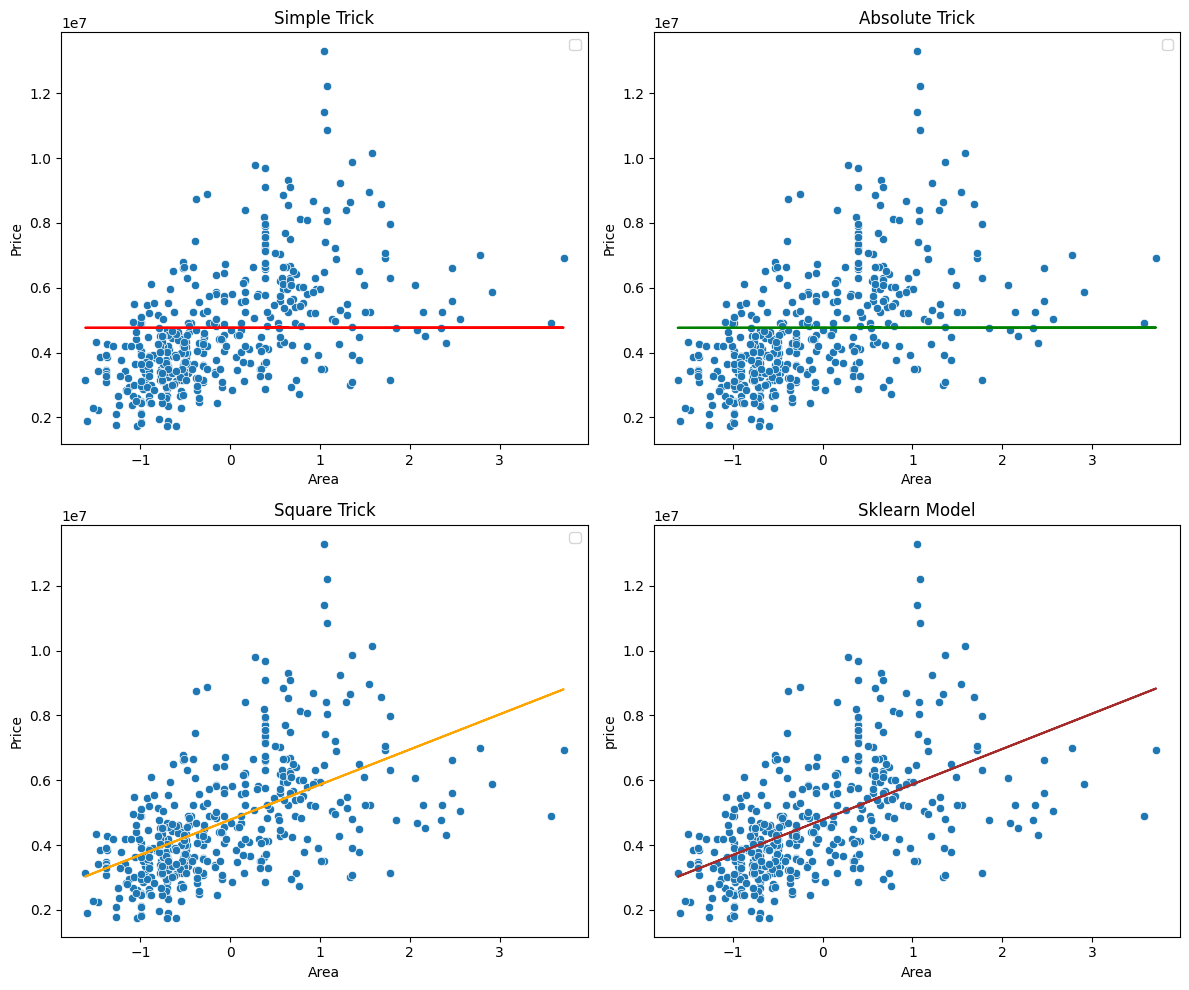

In [452]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier access
axes = axes.flatten()


sns.scatterplot(x=X_train['area'], y=y_train, ax=axes[0])
# Simple Trick plot
axes[0].plot(X_train['area'], m_simple * X_train['area'] + b_simple, color='red')
axes[0].set_title('Simple Trick')
axes[0].set_xlabel('Area')
axes[0].set_ylabel('Price')
axes[0].legend()


# Scatter plot on each subplot
sns.scatterplot(x=X_train['area'], y=y_train, ax=axes[1])
# Absolute Trick plot
axes[1].plot(X_train['area'], m_absolute * X_train['area'] + b_absolute, color='green')
axes[1].set_title('Absolute Trick')
axes[1].set_xlabel('Area')
axes[1].set_ylabel('Price')
axes[1].legend()

sns.scatterplot(x=X_train['area'], y=y_train, ax=axes[2])
# Square Trick plot
axes[2].plot(X_train['area'], m_square * X_train['area'] + b_square, color='orange')
axes[2].set_title('Square Trick')
axes[2].set_xlabel('Area')
axes[2].set_ylabel('Price')
axes[2].legend()

sns.scatterplot(x=X_train['area'], y=y_train, ax=axes[3])
# Sklearn Model plot
axes[3].plot(X_train['area'], model.coef_ * X_train['area'] + model.intercept_, color='brown')
axes[3].set_title('Sklearn Model')
axes[3].set_xlabel('Area')
axes[2].set_ylabel('Price')
axes[2].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [453]:
import random

def simple_trick2(m, b, r, p):

    x1 = random.uniform(0.0001, 0.001)
    x2 = random.uniform(0.0001, 0.001)

    p_hat = sum(m_i * r_i for m_i, r_i in zip(m, r)) + b

    # Case 1: Point is above the line and to the right of the y-axis
    if p > p_hat and r[0] > 0:
        m_new = [m_i + x1 if i == 0 else m_i for i, m_i in enumerate(m)]
        b_new = b + x2
    # Case 2: Point is above the line and to the left of the y-axis
    elif p > p_hat and r[0] < 0:
        m_new = [m_i - x1 if i == 0 else m_i for i, m_i in enumerate(m)]
        b_new = b + x2
    # Case 3: Point is below the line and to the right of the y-axis
    elif p < p_hat and r[0] > 0:
        m_new = [m_i - x1 if i == 0 else m_i for i, m_i in enumerate(m)]
        b_new = b - x2
    # Case 4: Point is below the line and to the left of the y-axis
    elif p < p_hat and r[0] < 0:
        m_new = [m_i + x1 if i == 0 else m_i for i, m_i in enumerate(m)]
        b_new = b - x2

    return m_new, b_new


In [454]:
def absolute_trick2(m, b, r, p, h):
    p_hat = sum(m_i * r_i for m_i, r_i in zip(m, r)) + b

    # Case 1: Point is above the line
    if p > p_hat:
        m_new = [m_i + h * r_i for m_i, r_i in zip(m, r)]
        b_new = b + h
    # Case 2: Point is below the line
    elif p < p_hat:
        m_new = [m_i - h * r_i for m_i, r_i in zip(m, r)]
        b_new = b - h

    return m_new, b_new


In [455]:
def square_trick2(m, b, r, p, h):
    p_hat = sum(m_i * r_i for m_i, r_i in zip(m, r)) + b

    m_new = [m_i + h * r_i * (p - p_hat) for m_i, r_i in zip(m, r)]

    b_new = b + h * (p - p_hat)

    return m_new, b_new


In [456]:
def linear_regression_with_multivariate(features, labels, trick_type, h=0.001, epochs=1000):
    m = [random.uniform(0.01, 0.1) for _ in features.columns]
    b = labels.mean()

    for _ in range(epochs):
        for r, p in zip(features.values, labels):
            if trick_type == 'simple':
                m, b = simple_trick2(m, b, r, p)
            elif trick_type == 'absolute':
                m, b = absolute_trick2(m, b, r, p, h)
            elif trick_type == 'square':
                m, b = square_trick2(m, b, r, p, h)

    return m, b

# Perform linear regression using the Simple Trick
m_simple, b_simple = linear_regression_with_multivariate(features=X_train, labels=y_train, trick_type='simple', h=0.001)
print(f"Simple Trick - Final Model: p̂ = {m_simple}r + {b_simple}")

# Perform linear regression using the Absolute Trick
m_absolute, b_absolute = linear_regression_with_multivariate(features=X_train, labels=y_train, trick_type='absolute', h=0.001)
print(f"Absolute Trick - Final Model: p̂ = {m_absolute}r + {b_absolute}")

# Perform linear regression using the Square Trick
m_square, b_square = linear_regression_with_multivariate(features=X_train, labels=y_train, trick_type='square', h=0.001)
print(f"Square Trick - Final Model: p̂ = {m_square}r + {b_square}")


Simple Trick - Final Model: p̂ = [137.62438502249103, 0.030580957583941214, 0.045574436189657966, 0.03388663913944264, 0.019200054506173077, 0.015031485552866122, 0.03633171290000907, 0.035135944343554465, 0.054120670103641834, 0.020953630899268032, 0.020132185397976683, 0.08302635410451004, 0.07512528923451556, 0.06793795436710089, 0.05553246737540971, 0.081935291801613, 0.05633687217270737, 0.026661425355996797, 0.012285444413532506, 0.024699950123534042, 0.09565992259972846]r + 4707330.233637047
Absolute Trick - Final Model: p̂ = [221.33970512308227, 132.98741495271696, 162.59440916781188, 150.40502893871587, 132.08569830619942, -54.974241188701875, -30.94525063011746, -119.98354615640281, 34.027910144027146, -91.92930312094852, 6.083422431261043, -88.91472593694597, 3.097995562098278, -142.9298202136507, 57.03573748664106, -122.93609793519424, 37.033483325149064, 11.064454646771232, -23.964159473457293, -72.93820449289065, 331.129216501774]r + 4707291.4999859035
Square Trick - Fina

In [457]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [458]:
#want to get weights and bias
print(model2.coef_)
print(model2.intercept_)

[ 0.00000000e+00  0.00000000e+00 -8.70442814e-10  6.38324127e-11
  5.61042392e-10 -2.21239623e-10 -1.86214003e-10  1.40588284e-10
 -5.33489995e-10  8.88898506e-11  1.02989218e-10 -4.66590538e-10
  1.80075393e-10 -1.04012713e-10  7.49088825e-11 -9.44268878e-11
  7.11539642e-12  2.47382559e-10 -8.64019967e-11 -2.91038305e-11
  1.86872283e+06]
4766729.247706423


In [459]:
def predict_numpy(features, m, b):
    return np.dot(features, m) + b

predictions_simple = predict_numpy(X_test.values, np.array(m_simple), b_simple)
predictions_absolute = predict_numpy(X_test.values, np.array(m_absolute), b_absolute)
predictions_square = predict_numpy(X_test.values, np.array(m_square), b_square)
predictions_model= model2.predict(X_test)

In [460]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate performance metrics for each model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, mae,

# Evaluate Simple Trick
mse_simple, mae_simple = evaluate_model(y_test, predictions_simple)
print(f"Simple Trick - MSE: {mse_simple}, MAE: {mae_simple}")

# Evaluate Absolute Trick
mse_absolute, mae_absolute= evaluate_model(y_test, predictions_absolute)
print(f"Absolute Trick - MSE: {mse_absolute}, MAE: {mae_absolute}")

# Evaluate Square Trick
mse_square, mae_square = evaluate_model(y_test, predictions_square)
print(f"Square Trick - MSE: {mse_square}, MAE: {mae_square}")

# Evaluate Sklearn Model
mse_model, mae_model= evaluate_model(y_test, predictions_model)
print(f"Sklearn Model - MSE: {mse_model}, MAE: {mae_model}")


Simple Trick - MSE: 4234247960322.023, MAE: 1522959.5242613417
Absolute Trick - MSE: 4231355392412.365, MAE: 1522311.1047864356
Square Trick - MSE: 4.177659747191852e-17, MAE: 4.836041992957439e-09
Sklearn Model - MSE: 1.3905638872795736e-18, MAE: 8.416080146754554e-10


##Checking Overfitting:

In [461]:
# Evaluate performance for all models on both train and test datasets

# Simple Trick
train_predictions_simple = predict_numpy(X_train.values, np.array(m_simple), b_simple)
train_mse_simple = mean_squared_error(y_train, train_predictions_simple)
train_mae_simple = mean_absolute_error(y_train, train_predictions_simple)

print(f"Simple Trick - Train MSE: {train_mse_simple}, Train MAE: {train_mae_simple}")
print(f"Simple Trick - Test MSE: {mse_simple}, Test MAE: {mae_simple}")

# Absolute Trick
train_predictions_absolute = predict_numpy(X_train.values, np.array(m_absolute), b_absolute)
train_mse_absolute = mean_squared_error(y_train, train_predictions_absolute)
train_mae_absolute = mean_absolute_error(y_train, train_predictions_absolute)

print(f"Absolute Trick - Train MSE: {train_mse_absolute}, Train MAE: {train_mae_absolute}")
print(f"Absolute Trick - Test MSE: {mse_absolute}, Test MAE: {mae_absolute}")

# Square Trick
train_predictions_square = predict_numpy(X_train.values, np.array(m_square), b_square)
train_mse_square = mean_squared_error(y_train, train_predictions_square)
train_mae_square = mean_absolute_error(y_train, train_predictions_square)

print(f"Square Trick - Train MSE: {train_mse_square}, Train MAE: {train_mae_square}")
print(f"Square Trick - Test MSE: {mse_square}, Test MAE: {mae_square}")

# Sklearn Model
train_predictions_model = model2.predict(X_train)
train_mse_model = mean_squared_error(y_train, train_predictions_model)
train_mae_model = mean_absolute_error(y_train, train_predictions_model)

print(f"Sklearn Model - Train MSE: {train_mse_model}, Train MAE: {train_mae_model}")
print(f"Sklearn Model - Test MSE: {mse_model}, Test MAE: {mae_model}")


Simple Trick - Train MSE: 3310659227351.5513, Train MAE: 1407225.2596108492
Simple Trick - Test MSE: 4234247960322.023, Test MAE: 1522959.5242613417
Absolute Trick - Train MSE: 3308070151936.0933, Train MAE: 1406542.283775282
Absolute Trick - Test MSE: 4231355392412.365, Test MAE: 1522311.1047864356
Square Trick - Train MSE: 2.8762690018969807e-17, Train MAE: 3.929284119277919e-09
Square Trick - Test MSE: 4.177659747191852e-17, Test MAE: 4.836041992957439e-09
Sklearn Model - Train MSE: 1.138909621555874e-18, Train MAE: 7.540295156863851e-10
Sklearn Model - Test MSE: 1.3905638872795736e-18, Test MAE: 8.416080146754554e-10
